In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(1099, 19)

In [6]:
df4['playlist_id'].value_counts()

4hKPJNFIhdAg4pAksn78FJ    11
3ykXidKLz1eYPvuGoFlD1e    11
5jROYSZSL7cO0jGAqkPx7C    10
1qXg9ck25tBRxeXsj8mbDG    10
4NlAd9NpIa92IjErMyAriM    10
                          ..
7xWdFCrU5Gka6qp1ODrSdK     1
6wyJ4bsjZaUKa9f6GeZlAO     1
1eqVgsNjaX6mxDPoefhocT     1
1QJ66s6YBZgxMUaVUyrhbo     1
7vJOXFe40axY7qS39vGDyH     1
Name: playlist_id, Length: 359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,language,emotion
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,tl,6
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,en,1


In [14]:
cols = ['language', 'playlist_genre']
df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df11.iloc[517,15]

'Bandito'

In [18]:
df12 = df11.set_index('track_name')

In [19]:
testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [20]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1099, 14)

In [21]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [22]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [23]:
df5.shape
scaler = MinMaxScaler()

In [24]:
df5['emotion'].value_counts()

1     393
6     137
3     108
5     103
7      91
2      91
4      67
8      39
10     38
9      32
Name: emotion, dtype: int64

In [25]:
train_data_001 = df5.iloc[:1024,7:]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_01.shape

(1024, 8)

In [26]:
testdf1_2 = testdf1_1.iloc[:1024,7:]
testdf2_2 = testdf2_1.iloc[:1024,7:]
testdf3_2 = testdf3_1.iloc[:1024,7:]
df13 = df12.iloc[:1024,7:]

In [27]:
(train_data_01 < 0).values.any()

False

In [28]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [29]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [30]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [32]:
discriminator = Discriminator()

In [33]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [34]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [35]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [36]:
 len(list(train_loader)[0][0])

32

In [37]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]
losses_g =[]
losses_d = []
labels = []
pred = []
true = []

In [38]:
#len(labels[0])

In [39]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.rand((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator
        latent_space_samples = torch.rand((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        losses_g.append(loss_generator)
        losses_d.append(loss_discriminator)

        labels.append(all_samples_labels)
        pred.append(output_discriminator)
        true.append(all_samples)

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.7596231698989868
Epoch: 0 Loss G.: 0.9572279453277588
Epoch: 10 Loss D.: 0.6945512890815735
Epoch: 10 Loss G.: 0.7349054217338562
Epoch: 20 Loss D.: 0.4501522481441498
Epoch: 20 Loss G.: 0.9902229905128479
Epoch: 30 Loss D.: 0.4335632920265198
Epoch: 30 Loss G.: 0.903194785118103
Epoch: 40 Loss D.: 0.8967173099517822
Epoch: 40 Loss G.: 2.2931571006774902
Epoch: 50 Loss D.: 0.10261388123035431
Epoch: 50 Loss G.: 4.045951843261719
Epoch: 60 Loss D.: 0.37328779697418213
Epoch: 60 Loss G.: 1.0102709531784058
Epoch: 70 Loss D.: 0.525275707244873
Epoch: 70 Loss G.: 1.1036673784255981
Epoch: 80 Loss D.: 0.587059497833252
Epoch: 80 Loss G.: 1.4922784566879272
Epoch: 90 Loss D.: 0.4001515507698059
Epoch: 90 Loss G.: 0.9987471103668213
Epoch: 100 Loss D.: 0.5404052138328552
Epoch: 100 Loss G.: 0.8543341159820557
Epoch: 110 Loss D.: 0.6251699924468994
Epoch: 110 Loss G.: 1.1261287927627563
Epoch: 120 Loss D.: 0.39581534266471863
Epoch: 120 Loss G.: 1.6173745393753052
Epoch: 13

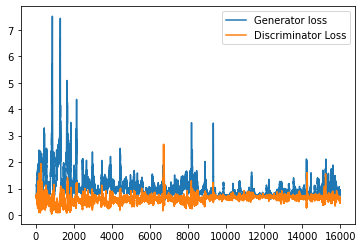

In [40]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.show()

In [41]:
metric_df = pd.DataFrame(labels,pred)

In [42]:
pred_b1 = pred[0].detach().numpy()
labs_b1 = labels[0].detach().numpy()

df_b1 = pd.DataFrame(pred_b1, columns=['pred'])

In [43]:
df_b1['labels'] = labs_b1

In [44]:
df_b11 = df_b1.sample(frac=1)
df_b11.head(2)

,pred,labels
63,0.503671,0.0
41,0.503583,0.0


In [45]:
X = df_b11['pred']
y = df_b11['labels'].astype("category")

In [46]:
#df_b11.to_csv( "/content/drive/My Drive/df_b11.csv", index=False, encoding='utf-8-sig')

In [47]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [48]:
latent_space_samples[:10]

tensor([[0.1925, 0.6178, 0.4777, 0.6212, 0.1426, 0.4867, 0.1475, 0.3802],
        [0.4220, 0.9018, 0.5494, 0.9311, 0.6747, 0.3323, 0.7161, 0.3724],
        [0.7827, 0.3442, 0.9944, 0.8014, 0.3414, 0.3110, 0.2008, 0.6194],
        [0.7299, 0.6083, 0.4241, 0.9239, 0.2714, 0.3771, 0.1865, 0.6004],
        [0.7393, 0.1204, 0.6326, 0.4384, 0.6596, 0.1980, 0.0834, 0.8010],
        [0.5738, 0.9594, 0.9560, 0.8165, 0.0456, 0.5994, 0.8298, 0.8752],
        [0.6999, 0.3332, 0.1169, 0.1781, 0.6042, 0.7678, 0.9533, 0.4452],
        [0.7904, 0.8354, 0.6973, 0.8107, 0.2891, 0.4576, 0.5652, 0.5142],
        [0.6399, 0.9698, 0.5413, 0.0918, 0.7704, 0.8478, 0.2766, 0.9116],
        [0.5405, 0.1433, 0.2683, 0.1084, 0.7111, 0.4524, 0.8234, 0.9904]])

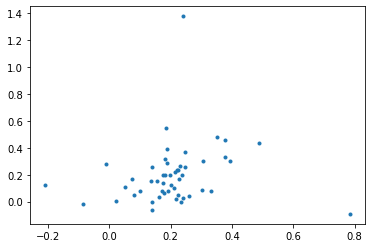

In [49]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [50]:
from scipy.spatial import distance

In [51]:
float_x = real_samples[0].double()

In [52]:
float_x = list(float_x.numpy())

In [53]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.217


In [54]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [55]:
#jaccard_score(final_generated_samples_df.iloc[0,:].values,float_x)

In [56]:
final_generated_samples_df.iloc[0,:].values

array([0.28831089, 0.41946447, 0.3731209 , 0.43834549, 1.0035876 ,
       1.02717423, 0.48870397, 0.99525559])

In [57]:
real_samples[0]

tensor([0.0637, 0.4660, 0.0233, 0.0701, 0.5734, 0.2855, 0.1667, 0.0000])

In [58]:
final_generated_samples_df.iloc[3,:].values

array([ 0.08078088,  0.60936964, -0.12200884,  0.2988686 ,  0.62958771,
        0.67959666,  0.39328188,  0.31503528])

In [59]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [60]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [61]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [62]:
train_data_vals2[517]

array([5.91000e-02, 3.33000e-01, 0.00000e+00, 1.28000e-01, 4.47000e-01,
       1.32097e+02, 8.00000e+00, 5.00000e+00])

In [63]:
generated_vals=[]
for i, j in final_generated_samples_df.iterrows():
  generated_vals.append(j.values)

train_data_vals=[]
for i, j in train_data_01.iterrows():
  train_data_vals.append(j.values)

def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cos.append(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

In [64]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_euc.append(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [65]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 1.463


In [66]:
df5.shape

(1099, 15)

In [67]:
# pick recommendations with cosine similarity
rec_cos = []
for i in generated_vals3:
  a = cos_similarity(i,train_data_vals2)

len train data: 1024 ; index: Jungli Sher ; cos sim: [[0.99998405]]
len train data: 1024 ; index: LUNA ; cos sim: [[0.99991373]]
len train data: 1024 ; index: Saudi Arabi Money Rich - Babos Remix ; cos sim: [[0.99999675]]
len train data: 1024 ; index: Tu Pirata Soy Yo ; cos sim: [[0.99998909]]
len train data: 1024 ; index: Oye ; cos sim: [[0.99999048]]
len train data: 1024 ; index: The Kill ; cos sim: [[0.99981709]]
len train data: 1024 ; index: El Beso ; cos sim: [[0.99999615]]
len train data: 1024 ; index: Te Doy Mi Vida ; cos sim: [[0.99998656]]
len train data: 1024 ; index: LUNA ; cos sim: [[0.99972169]]
len train data: 1024 ; index: Rattle Your Cage ; cos sim: [[0.99990311]]


In [68]:
rec_cose=[]
for i in rec_cos:
  rec_cose.append(i[0][0])

In [69]:
# pick recommendations with euclidean similarity
rec_euc = []
for i in generated_vals3:
  a = euclid_similarity(i,train_data_vals2)

len train data: 1024 ; index: Rearranged ; euclid sim: 9.940597579825935
len train data: 1024 ; index: The Second Brightest Star ; euclid sim: 4.547423844057539
len train data: 1024 ; index: Love Scars ; euclid sim: 1.5716193415729334
len train data: 1024 ; index: Red ; euclid sim: 4.324799419855746
len train data: 1024 ; index: Alone ; euclid sim: 1.3226491016846287
len train data: 1024 ; index: Von unten nach oben ; euclid sim: 3.0949891702225067
len train data: 1024 ; index: Sunburn ; euclid sim: 0.5965690771464589
len train data: 1024 ; index: Gush ; euclid sim: 1.8680483538545516
len train data: 1024 ; index: Come With Me ; euclid sim: 6.894051479964686
len train data: 1024 ; index: Soldier ; euclid sim: 3.1445084265320604


In [70]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [71]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [72]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT1.append(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT1.append(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [73]:
#compare recomendations to test subjects
rec_cosT1 = []
for i in generated_vals3:
  a = cos_similarity_t1(i,test_data1)

len train data: 10 ; index: Un autre que moi ; cos sim: [[0.9993323]]
len train data: 10 ; index: Lower ; cos sim: [[0.99994168]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99995854]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99938381]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99907647]]
len train data: 10 ; index: I Dare You ; cos sim: [[0.99998925]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99972229]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99939854]]
len train data: 10 ; index: Lower ; cos sim: [[0.99976443]]
len train data: 10 ; index: Tainted ; cos sim: [[0.9999873]]


In [74]:
rec_coseT1=[]
for i in rec_cosT1:
  rec_coseT1.append(i[0][0])

In [75]:
rec_eucT1 = []
for i in generated_vals3:
  a = euclid_similarity_t1(i,test_data1)

len train data: 10 ; index: Tainted ; euclid sim: 35.176965141067015
len train data: 10 ; index: Jungle ; euclid sim: 1.9268299909852165
len train data: 10 ; index: Howling ; euclid sim: 1.9047420878349246
len train data: 10 ; index: Lower ; euclid sim: 7.826505946481081
len train data: 10 ; index: Un autre que moi ; euclid sim: 6.309630580096539
len train data: 10 ; index: Un autre que moi ; euclid sim: 15.857601730419248
len train data: 10 ; index: Un autre que moi ; euclid sim: 4.901384764639936
len train data: 10 ; index: Song For You ; euclid sim: 6.472439932521907
len train data: 10 ; index: Tainted ; euclid sim: 8.54236947357641
len train data: 10 ; index: Jungle ; euclid sim: 4.174764738340747


In [76]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT2.append(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT2.append(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [77]:
#compare recomendations to test subjects
rec_cosT2 = []
for i in generated_vals3:
  a = cos_similarity_t2(i,test_data2)

len train data: 11 ; index: When Can I See You ; cos sim: [[0.99907124]]
len train data: 11 ; index: Rump Shaker ; cos sim: [[0.9999281]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99990272]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99902636]]
len train data: 11 ; index: Tender Lover ; cos sim: [[0.99891862]]
len train data: 11 ; index: When Can I See You ; cos sim: [[0.99988765]]
len train data: 11 ; index: Rump Shaker ; cos sim: [[0.99963722]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99911197]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99976813]]
len train data: 11 ; index: When Can I See You ; cos sim: [[0.99992812]]


In [78]:
rec_coseT2=[]
for i in rec_cosT2:
  rec_coseT2.append(i[0][0])

In [79]:
rec_eucT2 = []
for i in generated_vals3:
  a = euclid_similarity_t2(i,test_data2)

len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 17.365135683023084
len train data: 11 ; index: Just Got Paid ; euclid sim: 28.199844093102502
len train data: 11 ; index: Just Got Paid ; euclid sim: 3.0651343164257914
len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 39.52492464946355
len train data: 11 ; index: Tender Lover ; euclid sim: 7.010483867227495
len train data: 11 ; index: When Can I See You ; euclid sim: 2.1541002360687123
len train data: 11 ; index: Nasty ; euclid sim: 3.908068346298906
len train data: 11 ; index: I'm Dreamin' ; euclid sim: 5.02946235463491
len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 17.016435207133192
len train data: 11 ; index: Just Got Paid ; euclid sim: 30.99735619602841


In [80]:
def cos_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_cosT3.append(rec_score)
  rec_idx = testdf3_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t3(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_eucT3.append(rec_score)
  rec_idx = testdf3_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [81]:
#compare recomendations to test subjects
rec_cosT3 = []
for i in generated_vals3:
  a = cos_similarity_t3(i,test_data3)

len train data: 11 ; index: On Fire ; cos sim: [[0.99911853]]
len train data: 11 ; index: Classic (feat. POWERS) - POWERS Sunset Version ; cos sim: [[0.999941]]
len train data: 11 ; index: Sway - Chainsmokers Remix ; cos sim: [[0.99991206]]
len train data: 11 ; index: Sway - Chainsmokers Remix ; cos sim: [[0.99902075]]
len train data: 11 ; index: On Fire ; cos sim: [[0.99902568]]
len train data: 11 ; index: On Fire ; cos sim: [[0.99997354]]
len train data: 11 ; index: Classic (feat. POWERS) - POWERS Sunset Version ; cos sim: [[0.99964484]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99911512]]
len train data: 11 ; index: Cool Blue ; cos sim: [[0.99976362]]
len train data: 11 ; index: On Fire ; cos sim: [[0.99996372]]


In [82]:
rec_coseT3=[]
for i in rec_cosT3:
  rec_coseT3.append(i[0][0])

In [83]:
rec_eucT3 = []
for i in generated_vals3:
  a = euclid_similarity_t3(i,test_data3)

len train data: 11 ; index: Cool Blue ; euclid sim: 33.846383915649334
len train data: 11 ; index: Hall & Oates ; euclid sim: 5.1046138893183635
len train data: 11 ; index: Loudspeaker ; euclid sim: 6.312012434562562
len train data: 11 ; index: Feel It All Around ; euclid sim: 13.003380810915484
len train data: 11 ; index: On Fire ; euclid sim: 4.860154133650067
len train data: 11 ; index: On Fire ; euclid sim: 8.724451217269525
len train data: 11 ; index: Ghost - Lost Kings Remix ; euclid sim: 3.1557850860445744
len train data: 11 ; index: Indecision ; euclid sim: 6.002758740244427
len train data: 11 ; index: Cool Blue ; euclid sim: 5.288582911636616
len train data: 11 ; index: Hall & Oates ; euclid sim: 6.3159311600495975


In [84]:
rec_coseT1.extend(rec_coseT2)

In [87]:
rec_coseT1.extend(rec_coseT3)

In [89]:
len(rec_coseT1)

30

In [ ]:
rec_eucT1.extend(rec_eucT2)
rec_eucT1.extend(rec_eucT3)

In [95]:
print(rec_eucT1)

[35.176965141067015, 1.9268299909852165, 1.9047420878349246, 7.826505946481081, 6.309630580096539, 15.857601730419248, 4.901384764639936, 6.472439932521907, 8.54236947357641, 4.174764738340747, 17.365135683023084, 28.199844093102502, 3.0651343164257914, 39.52492464946355, 7.010483867227495, 2.1541002360687123, 3.908068346298906, 5.02946235463491, 17.016435207133192, 30.99735619602841, 33.846383915649334, 5.1046138893183635, 6.312012434562562, 13.003380810915484, 4.860154133650067, 8.724451217269525, 3.1557850860445744, 6.002758740244427, 5.288582911636616, 6.3159311600495975]


In [93]:
NMrec_coseT1 = [0.9994485475229062, 0.999877792631692, 0.9998138390559335, 0.9980154256187528, 
0.9994296793014785, 0.9996102928234575, 0.9979103117126699, 0.9999517602176865, 
0.9999813372083886, 0.9999577299557322, 0.9990970904505925, 0.99987547878444, 
0.9996022785643875, 0.9974254070062414, 0.9990677759631575, 0.999320747916991, 
0.997274614289726, 0.9998579640296097, 0.9999828143668469, 0.9998663115523426, 
0.9990922415460967, 0.9998790898355211, 0.9995948938115155, 0.9974250347930916, 0.9990587152972339, 
0.9993252253987199, 0.9972727539334341, 0.9998542983788713, 0.9999808289198082, 0.9998635187937598]

In [96]:
print(np.var(rec_coseT1), np.var(NMrec_coseT1))

1.4594245220273431e-07 7.97743643673355e-07


In [97]:
7.97743643673355e-07/1.4594245220273431e-07

5.466152114294876

In [102]:
# leven test for eqaul variance p-value lower than 0.01 means not equal
from scipy.stats import levene
stat, p = levene(rec_coseT1, NMrec_coseT1)
print('pvalue > 0.01 means equal variance, pvalue:' ,p)

pvalue > 0.01 means equal variance, pvalue: 0.03622776128977098


In [107]:
import scipy.stats as stats
stats.ttest_ind(rec_coseT1, b=NMrec_coseT1, equal_var=False)

Ttest_indResult(statistic=1.9401953712650837, pvalue=0.05956139839742171)

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.0595) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.